# Équations du système

## 1. **Couche 1 :**
   $
   \begin{pmatrix}
   z_1^{[1]} \\
   z_2^{[1]}
   \end{pmatrix} = W^{[1]} \begin{pmatrix}
   x_1 \\
   x_2
   \end{pmatrix} + \begin{pmatrix}
   b_1^{[1]} \\
   b_2^{[1]}
   \end{pmatrix}
   $
   
   $
   W^{[1]} = \begin{pmatrix}
   w_{11}^{[1]} & w_{12}^{[1]} \\
   w_{21}^{[1]} & w_{22}^{[1]}
   \end{pmatrix}
   $
   
  $
   z_1^{[1]} = w_{11}^{[1]} x_1 + w_{12}^{[1]} x_2 - b_1^{[1]}
   $
   
  $
   z_2^{[1]} = w_{21}^{[1]} x_1 + w_{22}^{[1]} x_2 - b_2^{[1]}
   $

## 2. **Fonction d'activation ReLU :**
   $
   ReLU(x) = \max(0, x)
   $

## 3. **Couche 2 :**
  $
   z_1^{[2]} = W^{[2]} \begin{pmatrix}
   a_1^{[1]} \\
   a_2^{[1]}
   \end{pmatrix} + b_1^{[2]}
   $
   
   $
   W^{[2]} = \begin{pmatrix}
   w_{11}^{[2]} & w_{12}^{[2]} 
   \end{pmatrix}
   $
   
   $
   z_1^{[2]} = w_{11}^{[2]} a_1^{[1]} + w_{12}^{[2]} a_2^{[1]} - b_1^{[2]}
   $

## 4. **Fonction d'activation sigmoïde :**
   $
   \sigma(x) = \frac{1}{1 + e^{-x}}
  $

## 5 **Fonction de perte d'entropie croisée**
La fonction de perte d'entropie croisée pour un problème de classification binaire est donnée par :

$
L = -\left( y \log(\hat{y}) + (1 - y) \log(1 - \hat{y}) \right)
$

où :
- $ y $ est la vraie étiquette (0 ou 1),
- $ \hat{y} $ est la prédiction du modèle (sortie de la couche finale après application de la sigmoïde).

---

## **Calcul de $\frac{\partial L}{\partial \hat{y}}$**
La dérivée de la perte $ L $ par rapport à la prédiction $ \hat{y} $ est :

$
\frac{\partial L}{\partial \hat{y}} = -\left( \frac{y}{\hat{y}} - \frac{1 - y}{1 - \hat{y}} \right)
$

---

## **Calcul de $\frac{\partial L}{\partial z^{[2]}}$**
La prédiction $ \hat{y} $ est obtenue en appliquant la fonction sigmoïde à $ z^{[2]} $ :

$
\hat{y} = \sigma(z^{[2]}) = \frac{1}{1 + e^{-z^{[2]}}}
$

La dérivée de la sigmoïde est :

$
\frac{\partial \hat{y}}{\partial z^{[2]}} = \hat{y} (1 - \hat{y})
$

Ainsi, la dérivée de \( L \) par rapport à \( z^{[2]} \) est :

$
\frac{\partial L}{\partial z^{[2]}} = \frac{\partial L}{\partial \hat{y}} \cdot \frac{\partial \hat{y}}{\partial z^{[2]}} = \left( -\frac{y}{\hat{y}} + \frac{1 - y}{1 - \hat{y}} \right) \cdot \hat{y} (1 - \hat{y}) = \hat{y} - y
$

Pour calculer les gradients de la fonction de perte $ L $ de type **entropie croisée** par rapport aux poids $ w_i $ et aux biais $ b_i $, on utilise la **rétropropagation** (backpropagation). Voici les étapes détaillées pour calculer $\frac{\partial L}{\partial w_i}$ et $\frac{\partial L}{\partial b_i}$ :

---

### 1. Fonction de perte d'entropie croisée
La fonction de perte d'entropie croisée pour un problème de classification binaire est donnée par :

$
L = -\left( y \log(\hat{y}) + (1 - y) \log(1 - \hat{y}) \right)
$

où :
- $ y $ est la vraie étiquette (0 ou 1),
- $ \hat{y} $ est la prédiction du modèle (sortie de la couche finale après application de la sigmoïde).

---

### 2. Calcul de $\frac{\partial L}{\partial \hat{y}}$
La dérivée de la perte $ L $ par rapport à la prédiction $ \hat{y} $ est :

$
\frac{\partial L}{\partial \hat{y}} = -\left( \frac{y}{\hat{y}} - \frac{1 - y}{1 - \hat{y}} \right)
$

---

### 3. Calcul de $\frac{\partial L}{\partial z^{[2]}}$
La prédiction $ \hat{y} $ est obtenue en appliquant la fonction sigmoïde à $ z^{[2]} $ :

$
\hat{y} = \sigma(z^{[2]}) = \frac{1}{1 + e^{-z^{[2]}}}
$

La dérivée de la sigmoïde est :

$
\frac{\partial \hat{y}}{\partial z^{[2]}} = \hat{y} (1 - \hat{y})
$

Ainsi, la dérivée de $ L $ par rapport à $ z^{[2]} $ est :

$
\frac{\partial L}{\partial z^{[2]}} = \frac{\partial L}{\partial \hat{y}} \cdot \frac{\partial \hat{y}}{\partial z^{[2]}} = \left( -\frac{y}{\hat{y}} + \frac{1 - y}{1 - \hat{y}} \right) \cdot \hat{y} (1 - \hat{y}) = \hat{y} - y
$

---

### 4. Calcul de $\frac{\partial L}{\partial w^{[2]}}$ et $\frac{\partial L}{\partial b^{[2]}}$
Pour la couche de sortie (couche 2), les gradients des poids $ w^{[2]} $ et du biais $ b^{[2]} $ sont calculés comme suit :

- **Gradient pour $ w^{[2]} $** :
  $
  \frac{\partial L}{\partial w^{[2]}} = \frac{\partial L}{\partial z^{[2]}} \cdot \frac{\partial z^{[2]}}{\partial w^{[2]}} = (\hat{y} - y) \cdot a^{[1]}
  $
  où $ a^{[1]} $ est l'activation de la couche précédente.

- **Gradient pour $ b^{[2]} $** :
  $
  \frac{\partial L}{\partial b^{[2]}} = \frac{\partial L}{\partial z^{[2]}} \cdot \frac{\partial z^{[2]}}{\partial b^{[2]}} = \hat{y} - y
  $

---

### 5. Calcul de $\frac{\partial L}{\partial w^{[1]}}$ et $\frac{\partial L}{\partial b^{[1]}}$
Pour la couche cachée (couche 1), on propage l'erreur vers l'arrière en utilisant la règle de la chaîne :

- **Gradient pour $ w^{[1]} $** :
  $
  \frac{\partial L}{\partial w^{[1]}} = \frac{\partial L}{\partial z^{[1]}} \cdot \frac{\partial z^{[1]}}{\partial w^{[1]}}
  $
  où :
  $
  \frac{\partial L}{\partial z^{[1]}} = \frac{\partial L}{\partial z^{[2]}} \cdot \frac{\partial z^{[2]}}{\partial a^{[1]}} \cdot \frac{\partial a^{[1]}}{\partial z^{[1]}}
  $
  - $ \frac{\partial z^{[2]}}{\partial a^{[1]}} = w^{[2]} $,
  - $ \frac{\partial a^{[1]}}{\partial z^{[1]}} $ est la dérivée de la fonction d'activation ReLU (1 si $ z^{[1]} > 0 $, sinon 0).

- **Gradient pour $ b^{[1]} $** :
  $
  \frac{\partial L}{\partial b^{[1]}} = \frac{\partial L}{\partial z^{[1]}}
  $

---

### 6. Mise à jour des paramètres
Une fois les gradients calculés, on met à jour les poids et les biais en utilisant la descente de gradient :

$
w_i = w_i - \alpha \frac{\partial L}{\partial w_i}
$
$
b_i = b_i - \alpha \frac{\partial L}{\partial b_i}
$

où $ \alpha $ est le taux d'apprentissage.

---

### Résumé des gradients
- Pour la couche de sortie :
  $
  \frac{\partial L}{\partial w^{[2]}} = (\hat{y} - y) \cdot a^{[1]}, \quad \frac{\partial L}{\partial b^{[2]}} = \hat{y} - y
  $
- Pour la couche cachée :
  $
  \frac{\partial L}{\partial w^{[1]}} = \frac{\partial L}{\partial z^{[1]}} \cdot x, \quad \frac{\partial L}{\partial b^{[1]}} = \frac{\partial L}{\partial z^{[1]}}
  $

Cela permet de mettre à jour les paramètres du réseau pour minimiser la fonction de perte.

## Demonstration de $\frac{\partial (XA)}{\partial X} = A^T$

### 1. Produit matriciel $ XA $
Soit :
- $ X $ une matrice de taille $ m \times n $,
- $ A $ une matrice de taille $ n \times p $.

Le produit $ XA $ est une matrice de taille $ m \times p $, définie par :

$
XA = \begin{pmatrix}
\sum_{j=1}^n X_{1j} A_{j1} & \sum_{j=1}^n X_{1j} A_{j2} & \cdots & \sum_{j=1}^n X_{1j} A_{jp} \\
\sum_{j=1}^n X_{2j} A_{j1} & \sum_{j=1}^n X_{2j} A_{j2} & \cdots & \sum_{j=1}^n X_{2j} A_{jp} \\
\vdots & \vdots & \ddots & \vdots \\
\sum_{j=1}^n X_{mj} A_{j1} & \sum_{j=1}^n X_{mj} A_{j2} & \cdots & \sum_{j=1}^n X_{mj} A_{jp}
\end{pmatrix}
$

---

### 2. Dérivée partielle de $ (XA)_{ik} $ par rapport à $ X_{ij} $
Chaque élément $ (XA)_{ik} $ du produit $ XA $ est donné par :

$
(XA)_{ik} = \sum_{j=1}^n X_{ij} A_{jk}
$

La dérivée partielle de $ (XA)_{ik} $ par rapport à $ X_{ij} $ est :

$
\frac{\partial (XA)_{ik}}{\partial X_{ij}} = A_{jk}
$

---

### 3. Dérivée matricielle $ \frac{\partial (XA)}{\partial X} $
En organisant toutes les dérivées partielles dans une matrice de même taille que $ X $ (c'est-à-dire $ m \times n $), on obtient :

$
\frac{\partial (XA)}{\partial X} = \begin{pmatrix}
A_{11} & A_{21} & \cdots & A_{n1} \\
A_{12} & A_{22} & \cdots & A_{n2} \\
\vdots & \vdots & \ddots & \vdots \\
A_{1p} & A_{2p} & \cdots & A_{np}
\end{pmatrix}
$

Cette matrice est la transposée de $ A $, notée $ A^\top $. Ainsi :

$
\frac{\partial (XA)}{\partial X} = A^\top
$

---

### 4. Résumé
- Le produit $ XA $ est une matrice de taille $ m \times p $.
- La dérivée $ \frac{\partial (XA)}{\partial X} $ est une matrice de taille $ m \times n $, égale à $ A^\top $.

---

### Exemple numérique
Supposons :
- $ X = \begin{pmatrix} x_{11} & x_{12} \end{pmatrix} $ (taille $ 1 \times 2 $),
- $ A = \begin{pmatrix} a_{11} & a_{12} \\ a_{21} & a_{22} \end{pmatrix} $ (taille $ 2 \times 2 $).

Alors :
$
XA = \begin{pmatrix} x_{11} a_{11} + x_{12} a_{21} & x_{11} a_{12} + x_{12} a_{22} \end{pmatrix}
$

La dérivée $ \frac{\partial (XA)}{\partial X} $ est :
$
\frac{\partial (XA)}{\partial X} = \begin{pmatrix} a_{11} & a_{21} \\ a_{12} & a_{22} \end{pmatrix}^\top = \begin{pmatrix} a_{11} & a_{12} \\ a_{21} & a_{22} \end{pmatrix}
$

# Tensorflow

In [3]:
import tensorflow as tf

# Afficher la version de TensorFlow
print("Version de TensorFlow :", tf.__version__)

Version de TensorFlow : 2.12.0


In [4]:
import tensorflow as tf

# Définir deux constantes
a = tf.constant(5)
b = tf.constant(3)

# Effectuer une addition
c = tf.add(a, b)

# Afficher le résultat
print("Résultat de l'addition :", c.numpy())

Résultat de l'addition : 8


In [5]:
import numpy as np

a = np.array([1, 2, 3])
b = np.array([4, 5, 6])
c = a + b
print(c)  # [5 7 9]

[5 7 9]


In [6]:
import tensorflow as tf

a = tf.constant([1, 2, 3])
b = tf.constant([4, 5, 6])
c = a + b
print(c.numpy())  # [5 7 9]

[5 7 9]


In [7]:
import tensorflow as tf

# Définir une variable (tenseur) dont on veut suivre les gradients
x = tf.Variable(3.0)  # x = 3, une valeur initiale

# Utiliser GradientTape pour enregistrer les opérations
with tf.GradientTape() as tape:
    y = x**2  # y = x²

# Calculer le gradient de y par rapport à x
dy_dx = tape.gradient(y, x)

# Afficher le résultat
print("y =", y.numpy())         # y = 9 (car 3² = 9)
print("dy/dx =", dy_dx.numpy()) # dy/dx = 6 (car 2 * 3 = 6)

y = 9.0
dy/dx = 6.0


In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

# Générer les données
n_samples = 200
X_data, y_data = make_moons(n_samples=n_samples, noise=0.2, random_state=None)

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

# Créer le modèle
model = Sequential()

# Ajouter la couche cachée avec 2 neurones et la fonction d'activation ReLU
model.add(Dense(2, input_dim=2, activation='relu'))

# Ajouter la couche de sortie avec 1 neurone et la fonction d'activation sigmoïde
model.add(Dense(1, activation='sigmoid'))

# Compiler le modèle
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entraîner le modèle
history = model.fit(X_train, y_train, epochs=100, batch_size=8, validation_data=(X_test, y_test))

# Évaluer le modèle
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')
# Afficher un résumé du modèle
model.summary()

Epoch 1/100
20/20 [==============================] - 0s 6ms/step - loss: 0.6866 - accuracy: 0.5813 - val_loss: 0.6844 - val_accuracy: 0.6000
Epoch 2/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6840 - accuracy: 0.5813 - val_loss: 0.6811 - val_accuracy: 0.6000
Epoch 3/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6812 - accuracy: 0.6000 - val_loss: 0.6776 - val_accuracy: 0.6250
Epoch 4/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6783 - accuracy: 0.6187 - val_loss: 0.6741 - val_accuracy: 0.6000
Epoch 5/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6752 - accuracy: 0.6250 - val_loss: 0.6696 - val_accuracy: 0.6500
Epoch 6/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6718 - accuracy: 0.6438 - val_loss: 0.6656 - val_accuracy: 0.6500
Epoch 7/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6684 - accuracy: 0.6562 - val_loss: 0.6612 - val_accuracy: 0.6750
Epoch 8/100
2

In [9]:
pip install pydot --break-system-packages

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


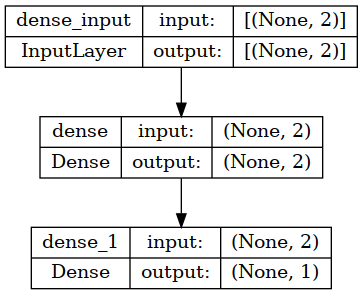

In [10]:
from tensorflow.keras.utils import plot_model
# Visualiser le modèle dans un fichier image
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

4661/4661 [==============================] - 2s 345us/step


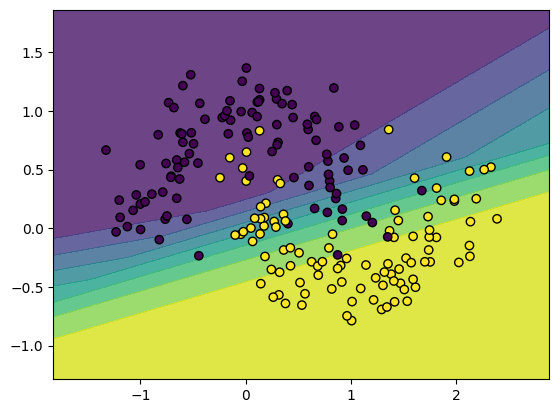

In [11]:
# Tracer la frontière de décision
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.show()

plot_decision_boundary(model, X_data, y_data)

Epoch 1/100
20/20 [==============================] - 0s 10ms/step - loss: 0.6111 - accuracy: 0.8625 - val_loss: 0.5789 - val_accuracy: 0.9000
Epoch 2/100
20/20 [==============================] - 0s 2ms/step - loss: 0.5629 - accuracy: 0.8438 - val_loss: 0.5298 - val_accuracy: 0.9000
Epoch 3/100
20/20 [==============================] - 0s 3ms/step - loss: 0.5202 - accuracy: 0.8313 - val_loss: 0.4890 - val_accuracy: 0.8750
Epoch 4/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4844 - accuracy: 0.8250 - val_loss: 0.4549 - val_accuracy: 0.8750
Epoch 5/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4526 - accuracy: 0.8250 - val_loss: 0.4288 - val_accuracy: 0.9000
Epoch 6/100
20/20 [==============================] - 0s 3ms/step - loss: 0.4266 - accuracy: 0.8250 - val_loss: 0.4021 - val_accuracy: 0.8750
Epoch 7/100
20/20 [==============================] - 0s 4ms/step - loss: 0.4031 - accuracy: 0.8313 - val_loss: 0.3841 - val_accuracy: 0.8750
Epoch 8/100


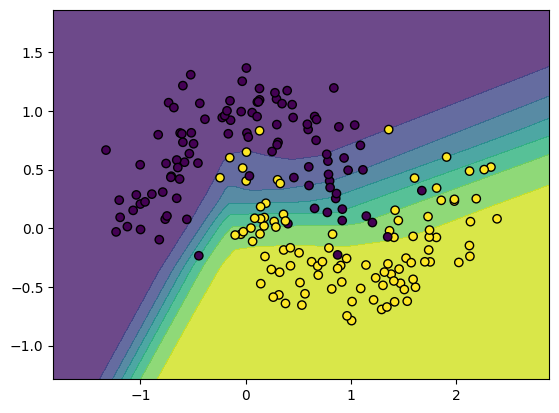

In [14]:
import datetime

# Créer le modèle
model = Sequential()

# Ajouter la couche cachée avec 2 neurones et la fonction d'activation ReLU
model.add(Dense(50, input_dim=2, activation='relu'))

# Ajouter la couche de sortie avec 1 neurone et la fonction d'activation sigmoïde
model.add(Dense(1, activation='sigmoid'))

# Compiler le modèle
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Configurer TensorBoard
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

# Entraîner le modèle
history = model.fit(X_train, y_train, epochs=100, batch_size=8, validation_data=(X_test, y_test),callbacks=[tensorboard_callback])

# Évaluer le modèle
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')

plot_decision_boundary(model, X_data, y_data)